In [6]:
import numpy as np
import pandas as pd
import numpy.random as rng
import json
import matplotlib.pyplot as plt
import glob

# Plot Evaluation Results

In [10]:
#files = glob.glob('evaluation_results/*.json')
files = ['evaluation_results/null.json', 'evaluation_results/linear_regression.json', 'evaluation_results/ann.json']
model_cfgs = []
for file in files:
    with open(file, 'r') as f:
        cfg = json.load(f)
    model_cfgs.append(cfg)

In [11]:
output_cols = model_cfgs[0]['output_cols']
labels = [l.replace('process_','') for l in output_cols]
model_names = [m['model']['name'] for m in model_cfgs]

cols = []
for m in model_cfgs:
    cols.append([m['test_mae_by_output'][c] for c in output_cols])
cols = np.array(cols)

results_df = pd.DataFrame(data=np.array(cols), columns=labels, index=model_names).T
results_df
#means_df = pd.DataFrame(data=np.array(mean_maes).T, columns=model_names, index=labels)

,Linear Regression,Null,ANN
Hydrogen,0.000014,0.000014,0.000013
Methane,0.000058,0.000059,0.000041
Ethane,0.000421,0.001391,0.000170
Propane,0.000899,0.007023,0.000294
i-Butane,0.001239,0.009279,0.000415
n-Butane,0.000756,0.005725,0.000260
i-Pentane,0.003536,0.003938,0.001671
n-Pentane,0.003607,0.003676,0.001749
Cyclopentane,0.000009,0.000052,0.000007
22-Mbutane,0.007376,0.012246,0.002539


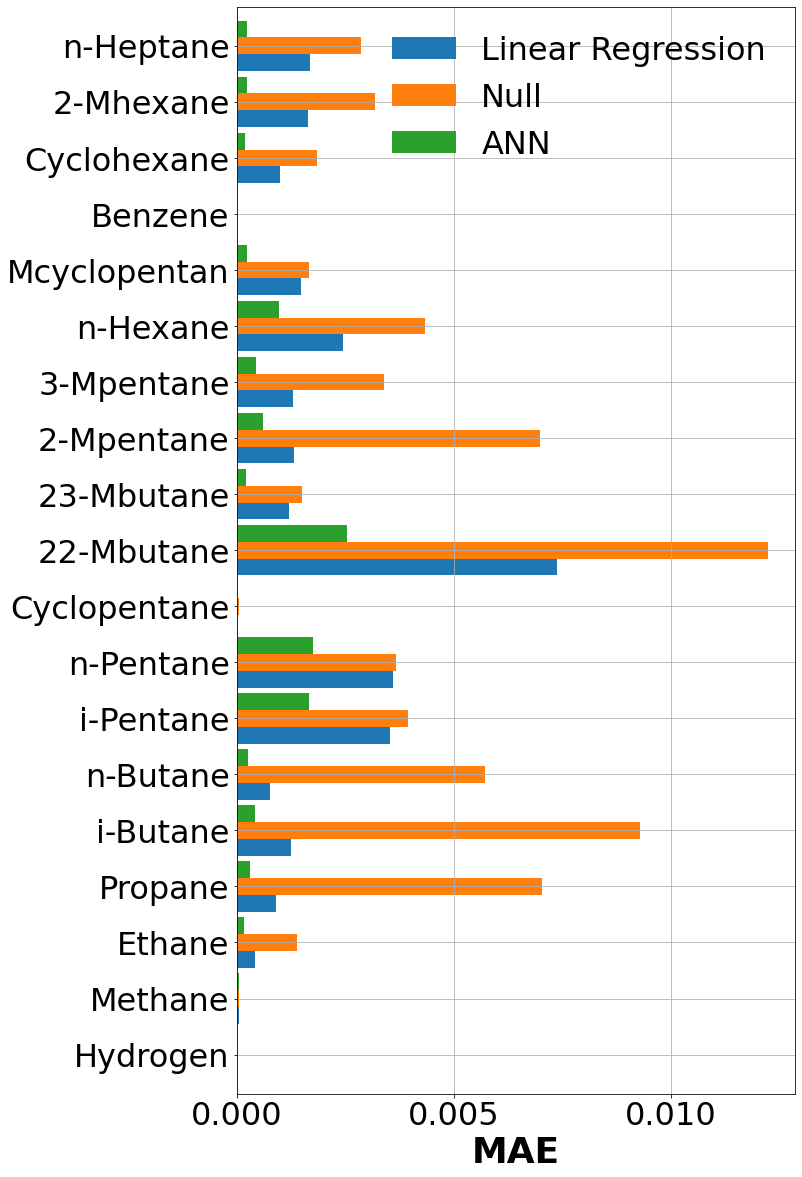

In [12]:
f, ax = plt.subplots(1, 1, figsize=(10, 20))
results_df.plot.barh(ax=ax, width=0.90)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_ylabel('')
ax.set_xlabel('MAE', fontsize=36, fontweight='bold')
ax.grid(True)
ax.legend(fontsize=32, frameon=False)